In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\santosh.d\Desktop\ET_tweets')


In [3]:
Text_analyser = SentimentIntensityAnalyzer()


In [7]:
Text_analyser.polarity_scores("Movie is good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [6]:
#Sentence="James Bond is smart and funny"
Text_analyser.polarity_scores("Movie could have been better")

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [11]:
Text_analyser.polarity_scores("Movie is good")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [13]:
Text_analyser.polarity_scores("Movie is good :)")

{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.7096}

In [14]:
Text_analyser.polarity_scores("Movie is very bad")

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

In [15]:
Text_analyser.polarity_scores("Movie is very bad :( :(")

{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.8793}

In [19]:
Text_analyser.polarity_scores("Movie is bad !")

{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5848}

In [18]:
Text_analyser.polarity_scores("Movie is bad ! !")

{'neg': 0.671, 'neu': 0.329, 'pos': 0.0, 'compound': -0.6229}

# Effect of intensifiers


In [20]:
Text_analyser.polarity_scores("Service is good ")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [21]:
Text_analyser.polarity_scores("Service is Extremely good ")

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

# Emoticons

In [23]:
Text_analyser.polarity_scores(":)")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}

In [25]:
Text_analyser.polarity_scores(":D")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}

In [26]:
Text_analyser.polarity_scores(":(")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}

In [27]:
Text_analyser.polarity_scores(":( :(")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.7003}

In [30]:
df.iloc[1]['Tweets']

'NSSO report citing high unemployment rate not verified: NITI Aayog | https://t.co/VpPK4Y5sTk https://t.co/ml5pDBDheN'

In [32]:
Text_analyser.polarity_scores(df.iloc[1]['Tweets'])

{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.4404}

In [33]:
i=0
SScore=[]
while (i<len(df)):
    vs=Text_analyser.polarity_scores(df.iloc[i]['Tweets'])
    SScore.append(vs['compound'])
    i=i+1

In [35]:
SScore = np.array(SScore)
SScore


array([ 0.4588, -0.4404,  0.    ,  0.5859,  0.    ,  0.7003,  0.2023,
        0.    ,  0.    ,  0.0772,  0.3818, -0.1027,  0.    ,  0.    ,
        0.2732,  0.    , -0.1531, -0.4404, -0.3515, -0.5574,  0.    ,
       -0.4939,  0.    ,  0.5423,  0.0772,  0.    ,  0.25  ,  0.25  ,
        0.2263,  0.5859,  0.5994,  0.    , -0.5106,  0.    ,  0.6734,
        0.    , -0.6369,  0.    , -0.1027,  0.5719,  0.    , -0.4767,
        0.    , -0.4404,  0.    ,  0.    ,  0.    ,  0.    ,  0.5719,
        0.    ,  0.4019,  0.7783,  0.    ,  0.4767,  0.    ,  0.2732,
        0.2023,  0.3612,  0.4215,  0.3818,  0.    ,  0.4939, -0.4215,
        0.6597,  0.    ,  0.3818,  0.    ,  0.2263,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.0772,  0.4215, -0.5719, -0.2732,
       -0.2263,  0.4404, -0.0516,  0.    , -0.25  ,  0.6369,  0.    ,
        0.    , -0.6705, -0.4767, -0.6324, -0.0516, -0.296 ,  0.    ,
        0.    ,  0.4019,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.3612,  0. 

(array([ 9., 13.,  7., 14., 91.,  7., 16., 21., 15.,  7.]),
 array([-0.7579 , -0.60428, -0.45066, -0.29704, -0.14342,  0.0102 ,
         0.16382,  0.31744,  0.47106,  0.62468,  0.7783 ]),
 <a list of 10 Patch objects>)

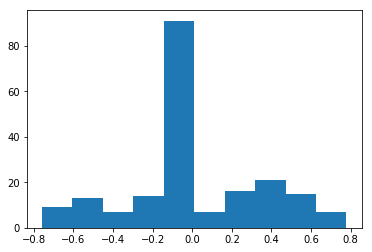

In [36]:
plt.hist(SScore, bins=10)

In [37]:
df['Vader']=SScore

In [38]:
df

,Unnamed: 0,Tweets,len,ID,Date,Source,Likes,RTs,coordinates,Lang,Vader
0,0,#IndianAirForce is preparing to welcome the ne...,140,1090988072731320322,2019-01-31 15:00:00,TweetDeck,11,3,NaN,en,0.4588
1,1,NSSO report citing high unemployment rate not ...,116,1090987477228228608,2019-01-31 14:57:38,Twitter Media Studio,17,4,NaN,en,-0.4404
2,2,RT @ETDefence: #China's #military-run #space s...,133,1090986004629069824,2019-01-31 14:51:47,Twitter Web Client,0,3,NaN,en,0.0000
3,3,#GandhiPeacePrize winner #YoheiSasakawa has ur...,139,1090984296196853760,2019-01-31 14:45:00,TweetDeck,11,2,NaN,en,0.5859
4,4,.@CocaCola has announced a 5-year global spons...,140,1090980523235635200,2019-01-31 14:30:00,TweetDeck,8,1,NaN,en,0.0000
5,5,Bharti Airtel posts Rs 86 cr surprise profit f...,118,1090976747057639424,2019-01-31 14:15:00,Twitter Media Studio,8,2,NaN,en,0.7003
6,6,#GST collections top Rs 1 lakh crore in Januar...,103,1090976235784716289,2019-01-31 14:12:58,Twitter Media Studio,30,5,NaN,en,0.2023
7,7,"#ETMarkets Evening Podcast, 31st January 2019 ...",114,1090974668645896198,2019-01-31 14:06:44,Twitter Media Studio,3,0,NaN,en,0.0000
8,8,The A-Z of tomorrow's Budget | https://t.co/bC...,108,1090974055321210882,2019-01-31 14:04:18,Twitter Media Studio,11,7,NaN,en,0.0000
9,9,Culture of ‘bending rules’ in India challenges...,111,1090972981105287169,2019-01-31 14:00:02,TweetDeck,8,2,NaN,en,0.0772


In [39]:
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if (df['Vader'][index] > 0.25)]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if (df['Vader'][index] < 0)]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if (df['Vader'][index] >= 0) & (df['Vader'][index] < 0.25) ]


In [40]:
df[df['Vader']==max(df['Vader'])].Tweets
df.iloc[134]['Tweets']

'“The scheme is pending approval from @FinMinIndia. @LabourMinistry is hopeful it will be cleared soon,” a senior la… https://t.co/VKaGaubjR0'

In [41]:
neu_tweets

["RT @ETDefence: #China's #military-run #space station in #Argentina is a 'black box' \r\n\r\nhttps://t.co/yG8cbbcRXq https://t.co/0lI7AHw854",
 '.@CocaCola has announced a 5-year global sponsorship partnership with international cricketing body #ICC, as it see… https://t.co/sMcvrjnAWx',
 '#GST collections top Rs 1 lakh crore in January: Govt | https://t.co/SUp7m4PSeP https://t.co/j1mKEWhCor',
 '#ETMarkets Evening Podcast, 31st January 2019 | Tune in for more - https://t.co/jiTmvpfeqA https://t.co/LSGR9ODNH5',
 "The A-Z of tomorrow's Budget | https://t.co/bCzRgiz2lR\r\n.\r\n.\r\n#BudgET2019 #BudgetWithET https://t.co/ucgdIzaGx2",
 'Culture of ‘bending rules’ in India challenges U.S. drug agency https://t.co/s2Iy0Vu8FV https://t.co/seltgEcNMe',
 "The NITI Aayog stepped in to clarify on the survey that claimed India's #unemployment rate rose to a 45-year high d… https://t.co/FeRRqok4ov",
 'In Pics: A #Japan #waste #plant opens its doors https://t.co/lvmDn8FfSH https://t.co/r3L6XubCUP',
 

In [42]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['Tweets'])))

Percentage of positive tweets: 24.5%


In [43]:
print("Percentage of Negative tweets: {}%".format(len(neg_tweets)*100/len(df['Tweets'])))

Percentage of Negative tweets: 23.5%


In [44]:
print("Percentage of Neutral tweets: {}%".format(len(neu_tweets)*100/len(df['Tweets'])))

Percentage of Neutral tweets: 50.5%


In [ ]:
import re

In [ ]:
def clean_tweet(tweets): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split()) 


In [ ]:
i=0
clean_tweets=[]
while (i<len(df)):
    twt=clean_tweet(df.iloc[i]['Tweets'])
    clean_tweets.append(twt)
    i=i+1

# Clean Tweets

In [ ]:
df['CleanTweets']=clean_tweets

In [ ]:
df

# Wordcloud


In [ ]:
Tweets_Combined = " ".join(df['CleanTweets'].values.astype(str))


In [ ]:
Tweet_mask = imread(r"C:\Users\santosh.d\Desktop\twitter_mask.png", flatten=True)
wcloud = WordCloud(background_color="white", stopwords=STOPWORDS, mask=Tweet_mask)
wcloud.generate(Tweets_Combined)

In [ ]:
plt.figure( figsize=(20,10))
plt.imshow(wcloud)
plt.axis('off')
#plt.savefig(r"C:\Users\santosh.d\Desktop\wordcloud_HS.png",dpi=300)
plt.show()